<ipython-input-20-3b35062d3f01>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='viridis')


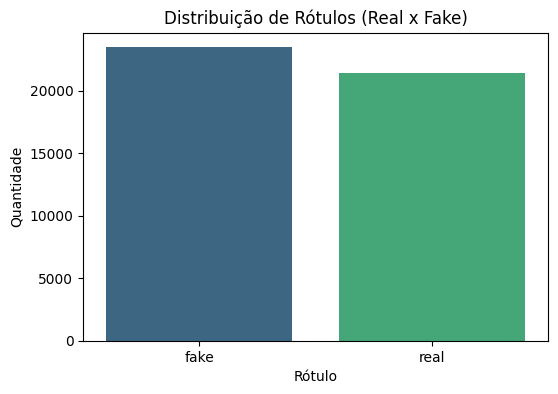

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4733
        real       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



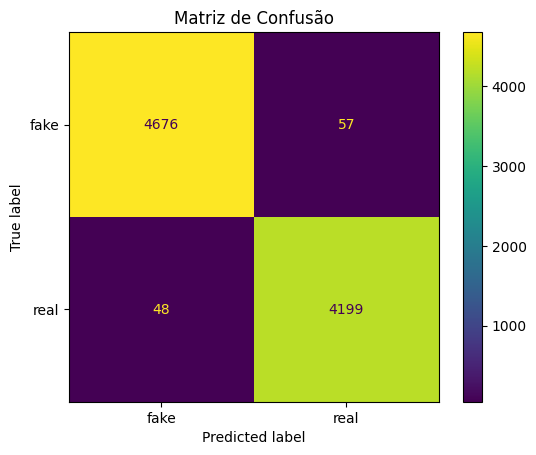

<ipython-input-20-3b35062d3f01>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=word_freq, palette='viridis')


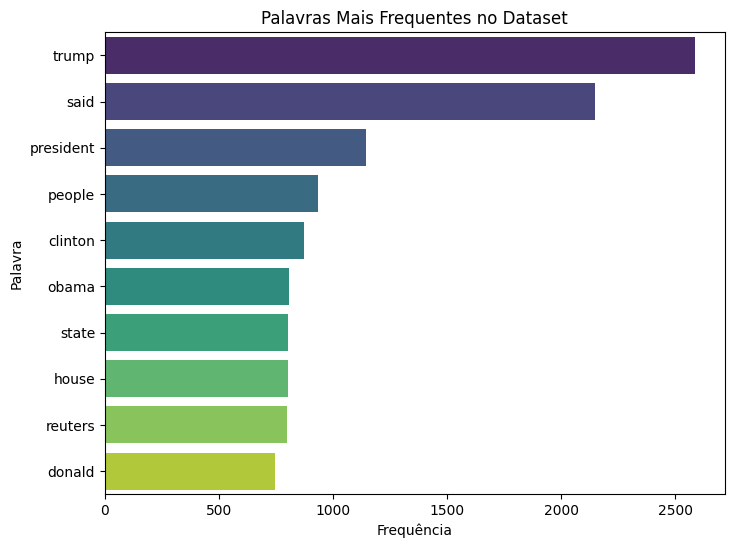

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

fake_data = pd.read_csv('Fake.csv')
true_data = pd.read_csv('True.csv')

fake_data['label'] = 'fake'
true_data['label'] = 'real'

data = pd.concat([fake_data, true_data], ignore_index=True)

plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=data, palette='viridis')
plt.title('Distribuição de Rótulos (Real x Fake)')
plt.xlabel('Rótulo')
plt.ylabel('Quantidade')
plt.show()

data['text'] = data['text'].str.lower()
data['text'] = data['text'].str.replace('[^\w\s]', '', regex=True)


vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(data['text'])
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=['fake', 'real'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['fake', 'real'])
disp.plot(cmap='viridis')
plt.title('Matriz de Confusão')
plt.show()

feature_names = vectorizer.get_feature_names_out()
word_counts = X.sum(axis=0).A1
word_freq = pd.DataFrame({'word': feature_names, 'count': word_counts})
word_freq = word_freq.sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x='count', y='word', data=word_freq, palette='viridis')
plt.title('Palavras Mais Frequentes no Dataset')
plt.xlabel('Frequência')
plt.ylabel('Palavra')
plt.show()
